In [1]:
from torchvision.datasets import Omniglot
import torchvision
from torchvision import *
from torchvision import datasets

train = datasets.Omniglot(root='./data', background=True, download=True, transform=transforms.ToTensor())
test = datasets.Omniglot(root='./data', background=False, download=True, transform=transforms.ToTensor())
print(len(train))
print(len(test))

Files already downloaded and verified
Files already downloaded and verified
19280
13180


13180


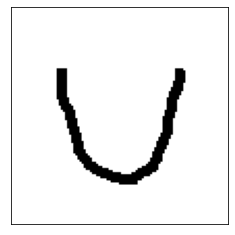

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import tensorflow 
from tensorflow import convert_to_tensor


plt.imshow(train[0][0].reshape(105,105))
plt.gray()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

print(len(test))

In [3]:
import torch

In [4]:
import numpy as np
from keras.callbacks import TensorBoard
from keras.layers import Input ,Dense, Flatten
from keras.models import Model



X_train = np.array([train[i][0].numpy().reshape(105*105) for i in range(19280)]) # matrix with the o r i g i n a l t r a i n data
#x_train=np.array(X_train)
Y_train = np.array([train[i][1] for i in range(19280)])
#Y_train=np.array(Y_train)
X_test = np.array([test[i][0].numpy().reshape(105*105) for i in range(13180)])# matrix with the t e s t data
#X_test=np.array(X_test)
Y_test = np.array([test[i][1] for i in range(13180)])
#Y_test=np.array(Y_test)
#X_valid =[X_train[i].reshape(105,105) for i in range(18500,len(X_train))]# matrix with the c r os s􀀀v a l i d a t i o n data




In [5]:

input_dim = (105*105) # the input dimens i ona l i t y D
latent_dim = 20# Z_dim
epochs = 10# the number o f t o t a l epochs f o r the t r a i n i n g
batch_size = 50 # the number o f data t r a ined in each i t e r a t i o n
log_dir = '/content/data' # the l o c a t i o n where the t ensorboard graph wi l l be saved

AUTOENCODEUR AVEC COUCHES DENSES = MAUVAIS RESULTATS

In [ ]:
input_img = Input(shape=(input_dim),)


encoded = Dense(128, activation='relu')(input_img)
encoded = Dropout(0.3)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dropout(0.3)(encoded)
encoded = Dense(20, activation='relu',activity_regularizer=regularizers.l1(10e-5))(encoded)



decoded = Dense(11025,activation='sigmoid')(encoded)

autoencoder = Model(input_img,decoded)

encoder = Model(input_img,encoded)

encoded_input = Input(shape=(latent_dim),)

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input,decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam',loss='binary_crossentropy' )

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

autoencoder.fit(X_train,X_train,epochs=epochs,batch_size=batch_size,shuffle=True,validation_data=(X_test,X_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/10
386/386 [==============================] - ETA: 0s - loss: 0.2424

In [ ]:
#encoded_imgs = encoder.predict(X_test)
#decoded_imgs = decoder.predict(encoded_imgs)
#print(decoded_imgs.shape)
decoded_imgs=autoencoder.predict(X_test)

In [ ]:
plt.imshow(decoded_imgs[25].reshape(105,105))
plt.gray()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

In [ ]:
autoencoder.summary()
decoder.summary()
encoder.summary()

Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 105, 105)]        0         
_________________________________________________________________
dense_24 (Dense)             (None, 105, 2)            212       
_________________________________________________________________
dense_25 (Dense)             multiple                  3         
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________
Model: "model_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_25 (Dense)             multiple                  3         
Total params: 3
Trainable params: 3
Non-tr

AUTOENCODEUR QUI MARCHE AVEC COUCHES CONV2D = BONs RESULTATS


In [ ]:
import keras
from keras import layers

input_img = keras.Input(shape=(105,105,1))
x = layers.ZeroPadding2D(padding=((1,0),(0,1)))(input_img)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.ZeroPadding2D(padding=((1,0),(0,1)))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.ZeroPadding2D(padding=((1,0),(0,1)))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same',strides=(1,1))(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Cropping2D(cropping=((1,0),(0,1)))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Cropping2D(cropping=((1,0),(0,1)))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Cropping2D(cropping=((1,0),(0,1)))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder2 = keras.Model(input_img, decoded)
autoencoder2.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
X_t = X_train.reshape(19280,105,105,1)
X_t2 = X_test.reshape(13180,105,105,1)
autoencoder2.fit(X_t,X_t,epochs=epochs,batch_size=batch_size,shuffle=True,validation_data=(X_t2,X_t2))

Epoch 1/10
386/386 [==============================] - 21s 52ms/step - loss: 0.1055 - val_loss: 0.0375
Epoch 2/10
386/386 [==============================] - 18s 47ms/step - loss: 0.0270 - val_loss: 0.0292
Epoch 3/10
386/386 [==============================] - 18s 48ms/step - loss: 0.0226 - val_loss: 0.0255
Epoch 4/10
386/386 [==============================] - 18s 48ms/step - loss: 0.0201 - val_loss: 0.0229
Epoch 5/10
386/386 [==============================] - 18s 47ms/step - loss: 0.0184 - val_loss: 0.0211
Epoch 6/10
386/386 [==============================] - 19s 49ms/step - loss: 0.0171 - val_loss: 0.0198
Epoch 7/10
386/386 [==============================] - 19s 49ms/step - loss: 0.0162 - val_loss: 0.0190
Epoch 8/10
386/386 [==============================] - 18s 48ms/step - loss: 0.0155 - val_loss: 0.0180
Epoch 9/10
386/386 [==============================] - 19s 48ms/step - loss: 0.0149 - val_loss: 0.0174
Epoch 10/10
386/386 [==============================] - 18s 48ms/step - loss: 0.014

In [ ]:
decoded_imgs_2 = autoencoder2.predict(X_test.reshape(13180,105,105,1))

In [ ]:
autoencoder2.summary()

Model: "model_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 105, 105, 1)]     0         
_________________________________________________________________
zero_padding2d_25 (ZeroPaddi (None, 106, 106, 1)       0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 106, 106, 16)      160       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 53, 53, 16)        0         
_________________________________________________________________
zero_padding2d_26 (ZeroPaddi (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 54, 54, 8)         1160      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 27, 27, 8)         0  

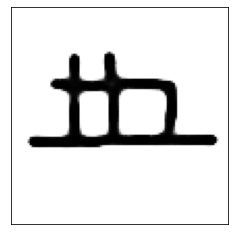

In [ ]:
plt.imshow(decoded_imgs_2[100].reshape(105,105))
plt.gray()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

VAE AVEC CONV2D layers

In [9]:
from keras import regularizers
import numpy as np
from keras.callbacks import TensorBoard
from keras.layers import Input ,Dense, Flatten, Conv2D, Dropout
from keras.models import Model
import keras
from keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# encoder network, mapping inputs to the latent distribution parameters
original_dim = (105,105,1)
latent_dim = 2


input_img = keras.Input(shape=(105,105,1))
x = layers.ZeroPadding2D(padding=((1,0),(0,1)))(input_img)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.ZeroPadding2D(padding=((1,0),(0,1)))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.ZeroPadding2D(padding=((1,0),(0,1)))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
h = layers.Flatten()(x)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

# sample new similar points from the latent space 

from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0],2),mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

# map sampled latent points back to reconstructed inputs

# Create encoder
encoder = keras.Model(input_img, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
encoded = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(27*27*64)(encoded)
x = layers.Reshape((27,27,64))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same',strides=(1,1))(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Cropping2D(cropping=((1,0),(0,1)))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Cropping2D(cropping=((1,0),(0,1)))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
outputs = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
decoder = keras.Model(encoded, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(input_img)[2])
vae = keras.Model(input_img, outputs, name='vae_mlp')
vae.summary()
decoder.summary()

# cost/loss function

reconstruction_loss = keras.losses.binary_crossentropy(input_img, outputs,axis=(1, 2))
reconstruction_loss *= 105*105
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)

# cost/loss function n°2 because the vae is not working so well (en test)

#reconstruction_loss = tf.reduce_mean(tf.reduce_sum(keras.losses.binary_crossentropy(input_img, outputs,axis=(1, 2))))
#kl_loss = -0.5*(1+z_log_sigma -tf.square(z_mean) - tf.exp(z_log_sigma))
#kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss))
#vae_loss = reconstruction_loss + kl_loss

# add the loss

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')


Model: "vae_mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 105, 105, 1)]     0         
                                                                 
 encoder (Functional)        [(None, 2),               73476     
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 decoder (Functional)        (None, 105, 105, 1)       200129    
                                                                 
Total params: 273,605
Trainable params: 273,605
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None,

In [10]:
X_t = X_train.reshape(19280,105,105,1)
X_t2 = X_test.reshape(13180,105,105,1)

vae.fit(X_t,X_t,epochs=30,batch_size=100,validation_data=(X_t2, X_t2))

Epoch 1/30
193/193 [==============================] - 54s 263ms/step - loss: 2558.0042 - val_loss: 2273.1892
Epoch 2/30
193/193 [==============================] - 47s 243ms/step - loss: 2176.1116 - val_loss: 2237.6284
Epoch 3/30
193/193 [==============================] - 47s 244ms/step - loss: 2147.1262 - val_loss: 2199.4360
Epoch 4/30
193/193 [==============================] - 47s 243ms/step - loss: 2135.4727 - val_loss: 2190.5757
Epoch 5/30
193/193 [==============================] - 48s 248ms/step - loss: 2127.8152 - val_loss: 2192.2104
Epoch 6/30
193/193 [==============================] - 48s 249ms/step - loss: 2118.6863 - val_loss: 2190.0591
Epoch 7/30
193/193 [==============================] - 48s 248ms/step - loss: 2111.8921 - val_loss: 2188.9417
Epoch 8/30
193/193 [==============================] - 47s 243ms/step - loss: 2106.0652 - val_loss: 2179.2139
Epoch 9/30
193/193 [==============================] - 48s 248ms/step - loss: 2100.9026 - val_loss: 2188.9180
Epoch 10/30
193/193

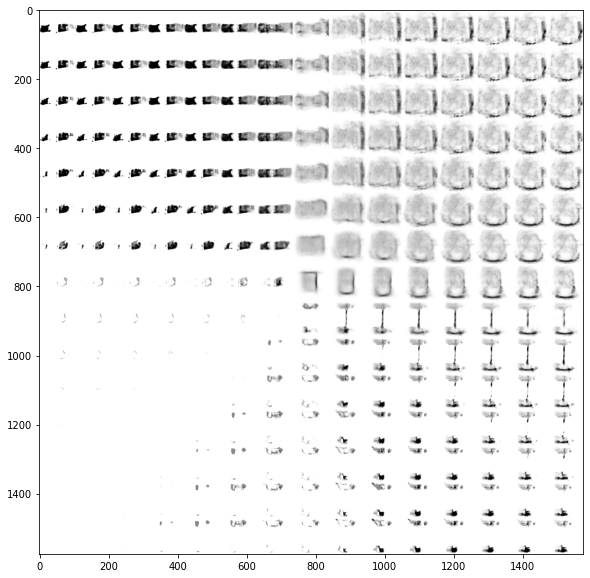

In [11]:
n = 15  # f 15x15 digits on the figure
digit_size = 105
figure = np.zeros((digit_size * n, digit_size * n))

# We sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)


for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(105, 105)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()


VAE avec sampling ( Réseau repris de MNIST, ne marche pas bien sur omniglot )




In [6]:
import keras
from keras import layers
from keras import regularizers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# encoder network, mapping inputs to the latent distribution parameters
original_dim = 105 * 105
intermediate_dim = 128
latent_dim = 2

inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

# sample new similar points from the latent space 

from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], 2),mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')


latent_inputs = keras.Input(shape=(2,), name='z_sampling')
x = layers.Dense(64, activation='relu')(latent_inputs)
outputs = layers.Dense(105*105, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

# cost/loss function

reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= 105*105
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')



In [7]:
vae.fit(X_train, X_train,epochs=50,batch_size=100,validation_data=(X_test, X_test))



Epoch 1/50
193/193 [==============================] - 8s 26ms/step - loss: 2760.8264 - val_loss: 2465.8535
Epoch 2/50
193/193 [==============================] - 3s 16ms/step - loss: 2323.6174 - val_loss: 2376.3572
Epoch 3/50
193/193 [==============================] - 4s 19ms/step - loss: 2281.2468 - val_loss: 2356.4917
Epoch 4/50
193/193 [==============================] - 3s 16ms/step - loss: 2264.3372 - val_loss: 2334.8105
Epoch 5/50
193/193 [==============================] - 3s 16ms/step - loss: 2247.3206 - val_loss: 2316.8464
Epoch 6/50
193/193 [==============================] - 4s 19ms/step - loss: 2228.3286 - val_loss: 2300.3198
Epoch 7/50
193/193 [==============================] - 4s 19ms/step - loss: 2218.7205 - val_loss: 2284.5994
Epoch 8/50
193/193 [==============================] - 3s 16ms/step - loss: 2209.4370 - val_loss: 2279.3245
Epoch 9/50
193/193 [==============================] - 4s 19ms/step - loss: 2204.7263 - val_loss: 2288.3611
Epoch 10/50
193/193 [================

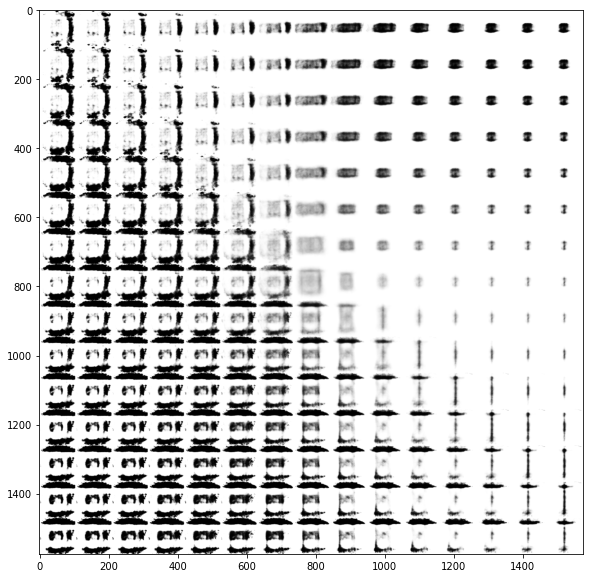

In [8]:
n = 15  # f 15x15 digits on the figure
digit_size = 105
figure = np.zeros((digit_size * n, digit_size * n))

# We sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)


for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(105, 105)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()
